**Sleep apnea**, is a potentially serious sleep disorder in which, breathing repeatedly stops and starts. If it goes untreated, it can cause loud snoring, daytime tiredness, or more serious problems like heart trouble or high blood pressure.

IMPORTING THE DATASET

Firstly, we have to import pandas, that tells Python to bring the pandas data analysis library into the current environment. Then, we require a function read_csv(), that loads data from a CSV file to a DataFrame.

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Sleep_health_and_lifestyle_dataset.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


Since, 'Person ID' and 'Gender' (by using feature selection method and heatmap) are of no importance in determining a person suffering from sleep disorder, the drop() function is used to drop the specified labels from columns.

In [ ]:
df.drop(['Person ID','Gender'],axis=1,inplace=True)
df

,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...
369,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


Inoder to detect the missing values in the whole DataFrame, isna() function is used and the total number of NaN values is counted using sum() function.

In [ ]:
df.isna().sum()

Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

Next step is to check the data type in pandas DataFrame, using the “dtype”attribute. The attribute returns a series with the data type(integer, float, Python object, etc) of each column. If any column has mixed data types,then the data type of the entire column is indicated as object dtype.

In [ ]:
df.dtypes

Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

Since ML models can only take numerical data, categorical columns are converted into numerical ones using label encoder, so that they can be fitted.

 **Scikit-Learn:**   ML library that provides various methods for data preprocessing and model training.


**Pre-processing:**  Transformations applied to our data before feeding it to the algorithm.


**fit_transform():** Method used to preprocess the data for model training.

*   The fit() method calculates the various required parameters.
*   The transform() method applies the calculated parameters to standardize the data.



In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lst1=['Occupation','BMI Category','Blood Pressure','Sleep Disorder']
for i in lst1:
  df[i]=le.fit_transform(df[i])

In [ ]:
df.dtypes

Age                          int64
Occupation                   int64
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                 int64
Blood Pressure               int64
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder               int64
dtype: object

Boxplot- Used to visualize how a given data (variable) is distributed using quartiles.

Outlier- A data point that is located outside the whiskers of the box plot.

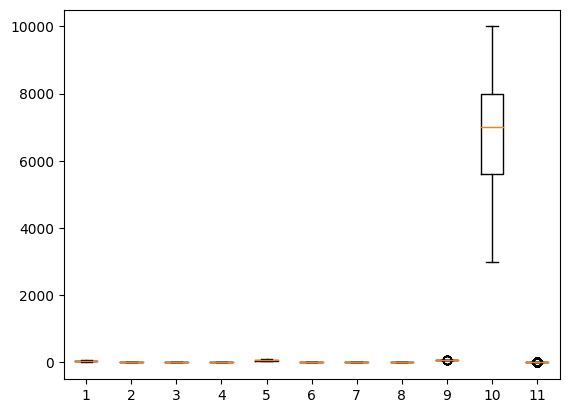

In [ ]:
plt.boxplot(df)
plt.show()


Inoder to visualize the data,and to make it more understandable by the user,  seaborn library provided by python is used. Internally this library uses matplotlib.

Here, correlation heatmap is used. Each variable is represented by a row and a column, and the cells show the correlation between them.

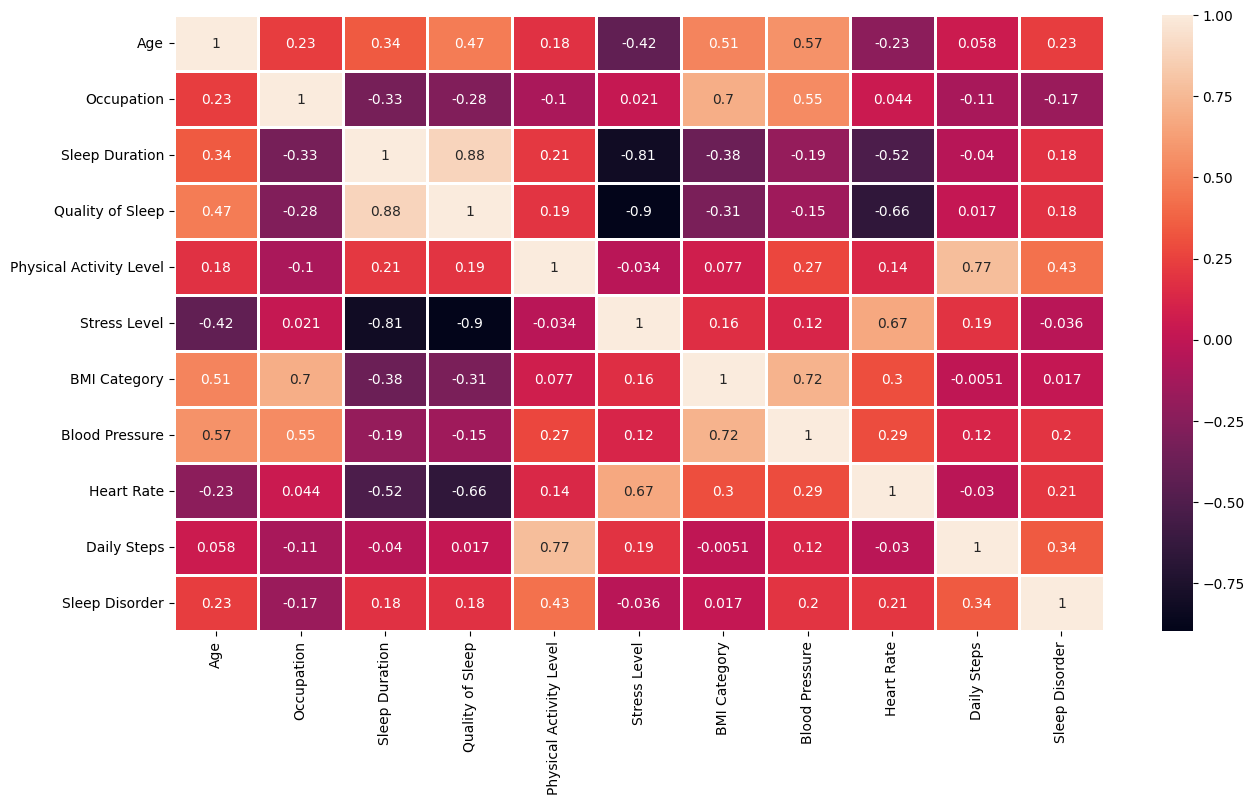

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=[15,8])
plt.show(sns.heatmap(df.corr(),annot=True,linewidth=1))

**X**- Independent variables

In [ ]:
X=df.iloc[:,:-1]
X

,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,27,9,6.1,6,42,6,3,11,77,4200
1,28,1,6.2,6,60,8,0,9,75,10000
2,28,1,6.2,6,60,8,0,9,75,10000
3,28,6,5.9,4,30,8,2,22,85,3000
4,28,6,5.9,4,30,8,2,22,85,3000
...,...,...,...,...,...,...,...,...,...,...
369,59,5,8.1,9,75,3,3,23,68,7000
370,59,5,8.0,9,75,3,3,23,68,7000
371,59,5,8.1,9,75,3,3,23,68,7000
372,59,5,8.1,9,75,3,3,23,68,7000


**y**- Dependent/target variable (the values to be predicted)

In [ ]:
y=df.iloc[:,-1]
y

0      1
1      1
2      1
3      2
4      2
      ..
369    2
370    2
371    2
372    2
373    2
Name: Sleep Disorder, Length: 374, dtype: int64

**MODEL SELECTION:**

The process of selecting one final ML model from among a collection of candidate ML models for a training dataset.

*   **train_test_split:** Split arrays or matrices into random train and test subsets (70% for training, and 30% for testing).
*  **random_state:** Every time we run code with random_state value 1, it will produce the same splitting datasets.





In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

**FEATURE SELECTION:**

The method of reducing the input variable to the model by using only relevant data and getting rid of noise in data.

In [ ]:
from sklearn.feature_selection import SelectKBest  #for fearure selection
from sklearn.feature_selection import mutual_info_classif
bestfeatures=SelectKBest(score_func=mutual_info_classif,k=19)
print("------------feature selection using the Information Gain method----------")
scores = mutual_info_classif(X_train, y_train)
# Create a list of feature names
num_features = X_train.shape[1]
feature_names = []
for i in range(num_features):
    feature_names.append(f'Feature_{i}')

df_scores = pd.DataFrame({'Feature':feature_names , 'Score': scores})
df_scores = df_scores.sort_values('Score', ascending=False)
print(df_scores)
print("-----------")
num_columns = X.shape[1]
column_names = [f'Feature_{i}' for i in range(num_columns)]
column_name = X.columns[0]
print(column_name)

------------feature selection using the Information Gain method----------
     Feature     Score
2  Feature_2  0.521077
1  Feature_1  0.488047
9  Feature_9  0.476153
7  Feature_7  0.456593
0  Feature_0  0.451440
6  Feature_6  0.367785
4  Feature_4  0.360162
5  Feature_5  0.328366
8  Feature_8  0.298410
3  Feature_3  0.204663
-----------
Age


In [ ]:
X_train.shape

(261, 10)

In [ ]:
y_train.shape

(261,)

**FEATURE SCALING:**

 **StandardScaler** - Used to resize the distribution of values ​​so that the mean of the observed values ​​is 0 and the standard deviation is 1.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train

array([[ 0.23894038,  1.07902922, -1.03219082, ...,  0.26405489,
         0.45103328, -0.52976231],
       [-0.57399087, -1.23480457,  0.11746126, ..., -1.87184362,
        -0.57261617,  0.09901424],
       [-0.92238997,  1.40957691, -1.67088641, ...,  0.54884135,
         2.75424456, -1.03278354],
       ...,
       [-1.03852301, -0.90425689, -1.28766906, ..., -0.59030452,
         0.45103328, -1.15853885],
       [ 0.23894038,  1.07902922, -1.03219082, ...,  0.26405489,
         0.45103328, -0.52976231],
       [-1.27078908, -0.90425689,  0.62841774, ..., -1.01748422,
        -0.06079144,  0.72779078]])

**Countplot:** Shows the count of observations in each categorical bin using bars.


*   value_counts()- Returns a series that contains count of unique values.

Axes(0.125,0.11;0.775x0.77)


1    219
2     78
0     77
Name: Sleep Disorder, dtype: int64

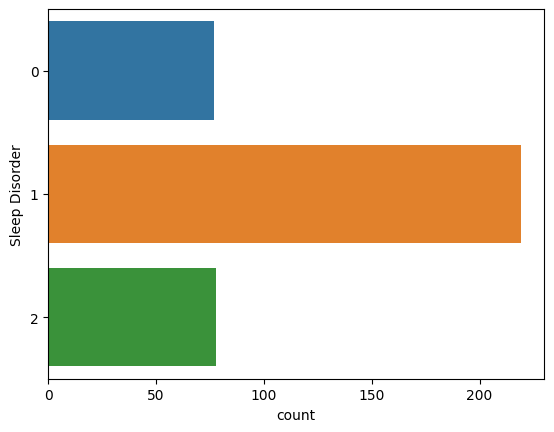

In [ ]:
y=df["Sleep Disorder"]
print(sns.countplot(data=df,y="Sleep Disorder"))
df["Sleep Disorder"].value_counts()

**NORMAL METHOD:**

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

In [ ]:
rf=RandomForestClassifier()
ad=AdaBoostClassifier()
lr=LogisticRegression()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()
svc=SVC()
dt=DecisionTreeClassifier(criterion="entropy")
lst1=[ad,dt,gb,rf,lr,svc,xgb]
for k in lst1:
  k.fit(X_train,y_train)
  y_pred=k.predict(X_test)
  print("--------------------------------------------------------------------------------------------------------------------------------------------")
  print(".......",k,".........")
  print(classification_report(y_test,y_pred))

--------------------------------------------------------------------------------------------------------------------------------------------
....... AdaBoostClassifier() .........
              precision    recall  f1-score   support

           0       0.67      0.35      0.46        23
           1       0.79      0.88      0.83        65
           2       0.69      0.80      0.74        25

    accuracy                           0.75       113
   macro avg       0.72      0.67      0.68       113
weighted avg       0.74      0.75      0.74       113

--------------------------------------------------------------------------------------------------------------------------------------------
....... DecisionTreeClassifier(criterion='entropy') .........
              precision    recall  f1-score   support

           0       0.81      0.74      0.77        23
           1       0.88      0.94      0.91        65
           2       0.91      0.84      0.87        25

    accuracy      

**OVER SAMPLING:**

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X_train_s,y_train_s=sm.fit_resample(X_train,y_train)

In [ ]:
rf=RandomForestClassifier()
ad=AdaBoostClassifier()
lr=LogisticRegression()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()
svc=SVC()
dt=DecisionTreeClassifier(criterion="entropy")
lst1=[ad,dt,gb,rf,lr,svc,xgb]
for i in lst1:
  i.fit(X_train_s,y_train_s)
  y_pred=i.predict(X_test)
  print("--------------------------------------------------------------------------------------------------------------------------------------------")
  print(".......",i,".........")
  print(classification_report(y_test,y_pred))

--------------------------------------------------------------------------------------------------------------------------------------------
....... AdaBoostClassifier() .........
              precision    recall  f1-score   support

           0       0.84      0.70      0.76        23
           1       0.76      0.82      0.79        65
           2       0.46      0.44      0.45        25

    accuracy                           0.71       113
   macro avg       0.69      0.65      0.67       113
weighted avg       0.71      0.71      0.71       113

--------------------------------------------------------------------------------------------------------------------------------------------
....... DecisionTreeClassifier(criterion='entropy') .........
              precision    recall  f1-score   support

           0       0.80      0.70      0.74        23
           1       0.88      0.94      0.91        65
           2       0.88      0.84      0.86        25

    accuracy      

**UNDER SAMPLING:**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
us=RandomUnderSampler(random_state=1)
X_train_us,y_train_us=us.fit_resample(X_train,y_train)

In [ ]:
rf=RandomForestClassifier()
ad=AdaBoostClassifier()
lr=LogisticRegression()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()
svc=SVC()
dt=DecisionTreeClassifier(criterion="entropy")
lst1=[ad,dt,gb,rf,lr,svc,xgb]
for j in lst1:
  j.fit(X_train_us,y_train_us)
  y_pred=j.predict(X_test)
  print("--------------------------------------------------------------------------------------------------------------------------------------------")
  print(".......",j,".........")
  print(classification_report(y_test,y_pred))

--------------------------------------------------------------------------------------------------------------------------------------------
....... AdaBoostClassifier() .........
              precision    recall  f1-score   support

           0       0.79      0.65      0.71        23
           1       0.87      0.89      0.88        65
           2       0.74      0.80      0.77        25

    accuracy                           0.82       113
   macro avg       0.80      0.78      0.79       113
weighted avg       0.82      0.82      0.82       113

--------------------------------------------------------------------------------------------------------------------------------------------
....... DecisionTreeClassifier(criterion='entropy') .........
              precision    recall  f1-score   support

           0       0.59      0.74      0.65        23
           1       0.89      0.78      0.84        65
           2       0.78      0.84      0.81        25

    accuracy      

**Principal Component Analysis (PCA):**

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=3,random_state=3)
X_trainm=pca.fit_transform(X_train)
X_testm=pca.transform(X_test)
pca.explained_variance_ratio_
print(X_trainm.shape)
print(X_testm.shape)

(261, 3)
(113, 3)


In [ ]:
rf=RandomForestClassifier()
ad=AdaBoostClassifier()
lr=LogisticRegression()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()
svc=SVC()
dt=DecisionTreeClassifier(criterion="entropy")
lst1=[ad,dt,gb,rf,lr,svc,xgb]
for k in lst1:
  k.fit(X_trainm,y_train)
  y_pred=k.predict(X_testm)
  print("--------------------------------------------------------------------------------------------------------------------------------------------")
  print(".......",k,".........")
  print(classification_report(y_test,y_pred))

--------------------------------------------------------------------------------------------------------------------------------------------
....... AdaBoostClassifier() .........
              precision    recall  f1-score   support

           0       0.77      0.74      0.76        23
           1       0.79      0.92      0.85        65
           2       0.87      0.52      0.65        25

    accuracy                           0.80       113
   macro avg       0.81      0.73      0.75       113
weighted avg       0.80      0.80      0.79       113

--------------------------------------------------------------------------------------------------------------------------------------------
....... DecisionTreeClassifier(criterion='entropy') .........
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        23
           1       0.88      0.89      0.89        65
           2       0.83      0.80      0.82        25

    accuracy      

**CONCLUSION:**

> From the results, we can see that for this particular dataset, GradientBoosting, RandomForest, SVC and XGBClassifier have performed better with an accuracy 0.89 than the rest.


